# House Price Prediction

## Calfornia Housing Prices Dataset

#### *Load necessary libraries*

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

#### *Load and Inspect the data*

In [2]:
data = pd.read_csv("housing.csv")
df = pd.DataFrame(data)

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.shape

(20640, 10)

#### *Data cleaning*

In [7]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [8]:
#fill it or drop it
new_df = df.dropna()

In [9]:
new_df.drop_duplicates()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


#### *Data Exploration (EDA) with NumPy and Pandas*

In [10]:
new_df.nunique()

longitude               844
latitude                861
housing_median_age       52
total_rooms            5911
total_bedrooms         1923
population             3879
households             1809
median_income         12825
median_house_value     3833
ocean_proximity           5
dtype: int64

In [11]:
np.median(new_df.population)

np.float64(1166.0)

In [12]:
np.median(new_df.households)

np.float64(409.0)

In [13]:
np.median(new_df.total_rooms)

np.float64(2127.0)

#### *Visualization with Matplotlib*

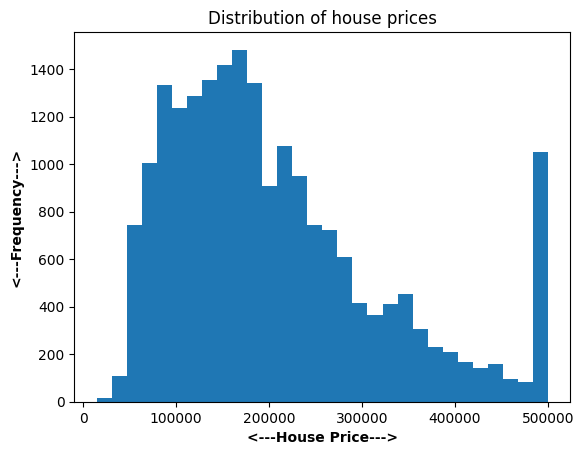

In [14]:
plt.hist(new_df.median_house_value, bins = 30)

plt.xlabel('<---House Price--->', weight = 'bold')
plt.ylabel('<---Frequency--->', weight = 'bold')
plt.title('Distribution of house prices')

plt.show()

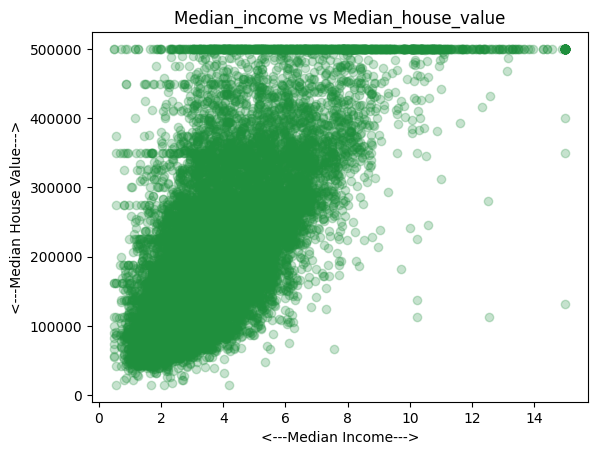

In [15]:
x = np.array([new_df.median_income])
y = np.array([new_df.median_house_value])

plt.scatter(x,y, color = '#1f8f3d', alpha = 0.25)


plt.xlabel("<---Median Income--->")
plt.ylabel("<---Median House Value--->")

plt.title("Median_income vs Median_house_value")

plt.show()

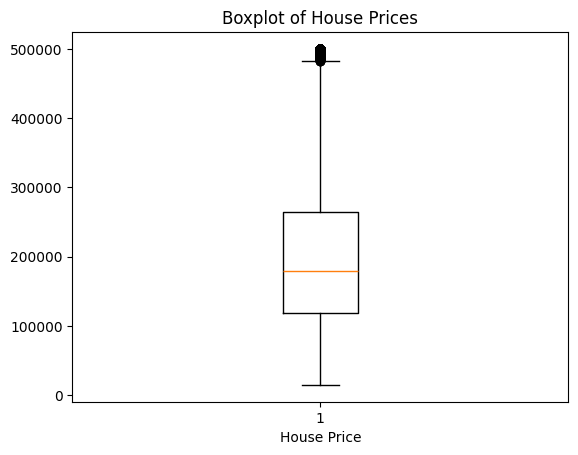

In [16]:
plt.boxplot(new_df['median_house_value'])
plt.xlabel('House Price')
plt.title('Boxplot of House Prices')
plt.show()

#### *Working with Geographical Data*

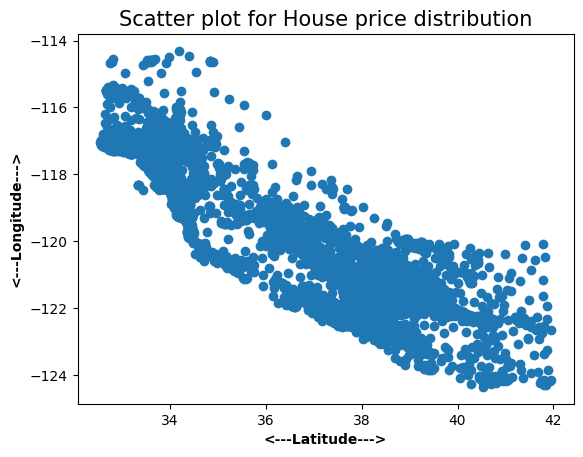

In [17]:
y = np.array([new_df.longitude])
x = np.array([new_df.latitude])

plt.scatter(x,y)

plt.ylabel('<---Longitude--->', weight = 'bold')
plt.xlabel('<---Latitude--->', weight = 'bold')

plt.title('Scatter plot for House price distribution', fontsize = 15)

plt.show()

### *Advanced Data Analysis*

#### *Price per room*

In [18]:
new_df["price_per_room"] = new_df["median_house_value"] / new_df["total_rooms"] 
new_df.head()

C:\Users\NIKHIL VERMA\AppData\Local\Temp\ipykernel_21020\2963982545.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["price_per_room"] = new_df["median_house_value"] / new_df["total_rooms"]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_per_room
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,514.318182
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,50.500070
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,240.013633
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,267.896389
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,210.325753


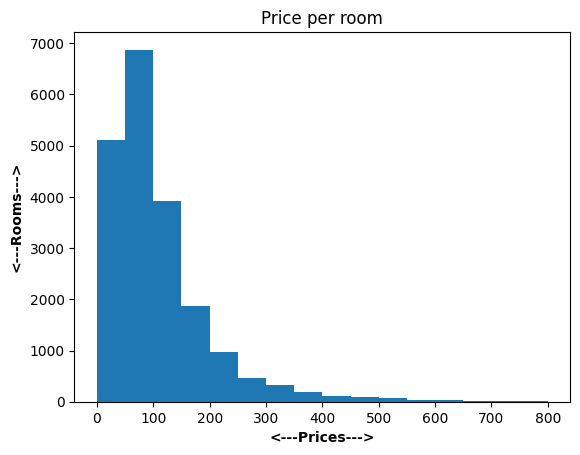

In [19]:
bins = [0,50,100,150,200,250,300,350,400,450,500,550,600,650,700,750,800]
plt.hist(new_df.price_per_room, bins = bins)

plt.xticks([0,100,200,300,400,500,600,700,800])

plt.title('Price per room')
plt.ylabel('<---Rooms--->', weight = 'bold')
plt.xlabel('<---Prices--->', weight = 'bold')

plt.show()

#### *Population Density*

In [20]:
new_df["population_per_household"] = new_df["population"]/new_df["households"]
new_df.head()

C:\Users\NIKHIL VERMA\AppData\Local\Temp\ipykernel_21020\3172304015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["population_per_household"] = new_df["population"]/new_df["households"]


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,514.318182,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,50.500070,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,240.013633,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,267.896389,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,210.325753,2.181467


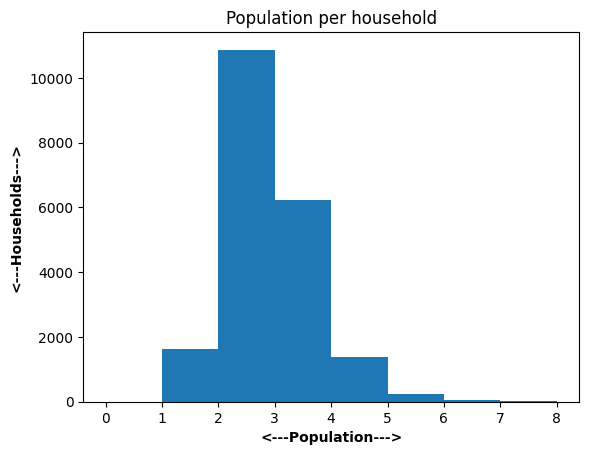

In [21]:
bins = [0,1,2,3,4,5,6,7,8]
plt.hist(new_df.population_per_household, bins = bins)

plt.title('Population per household')
plt.xlabel('<---Population--->', weight = 'bold')
plt.ylabel('<---Households--->', weight = 'bold')

plt.show()

#### *Room Density*

In [22]:
new_df["room_per_households"] = new_df.total_rooms/new_df.households
new_df.head()

C:\Users\NIKHIL VERMA\AppData\Local\Temp\ipykernel_21020\680124065.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df["room_per_households"] = new_df.total_rooms/new_df.households


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,price_per_room,population_per_household,room_per_households
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,514.318182,2.555556,6.984127
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,50.500070,2.109842,6.238137
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,240.013633,2.802260,8.288136
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,267.896389,2.547945,5.817352
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,210.325753,2.181467,6.281853


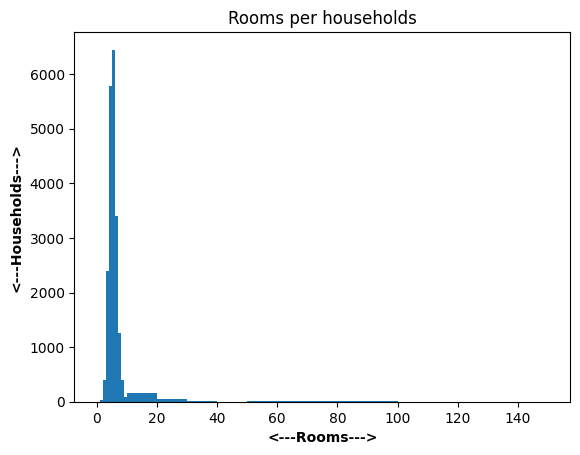

In [23]:
bins = [0,1,2,3,4,5,6,7,8,9,10,20,30,40,50,100,150]
plt.hist(new_df.room_per_households, bins = bins)

plt.title('Rooms per households')
plt.xlabel('<---Rooms--->', weight = 'bold')
plt.ylabel('<---Households--->', weight = 'bold')

plt.show()

###  *Grouping & Aggregation*

##### Average price per region count

In [24]:
df.groupby("ocean_proximity")["median_house_value"].count()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
ISLAND           5
NEAR BAY      2290
NEAR OCEAN    2658
Name: median_house_value, dtype: int64

##### Average price per region 

In [25]:
df.groupby("ocean_proximity")["median_house_value"].mean()

ocean_proximity
<1H OCEAN     240084.285464
INLAND        124805.392001
ISLAND        380440.000000
NEAR BAY      259212.311790
NEAR OCEAN    249433.977427
Name: median_house_value, dtype: float64

##### Maximum median income per region

In [26]:
df.groupby("ocean_proximity")["median_income"].max()

ocean_proximity
<1H OCEAN     15.0001
INLAND        15.0001
ISLAND         3.3906
NEAR BAY      15.0001
NEAR OCEAN    15.0001
Name: median_income, dtype: float64

##### Minimum median income per region

In [27]:
df.groupby("ocean_proximity")["median_income"].min()

ocean_proximity
<1H OCEAN     0.4999
INLAND        0.4999
ISLAND        2.1579
NEAR BAY      0.4999
NEAR OCEAN    0.5360
Name: median_income, dtype: float64

### *NumPy-Based Calculations*

In [28]:
np.percentile(new_df["median_house_value"], [25,50,75])

array([119500., 179700., 264700.])